In [2]:
import grpc
from earth_service_pb2_grpc import EarthServiceStub
from earth_service_pb2 import GetAllCountriesRequest,SearchCountriesRequest,GetCountriesInBoundaryRequest

channel = grpc.secure_channel("countries-fysuv2s5na-ez.a.run.app:443",grpc.ssl_channel_credentials())
client_stub = EarthServiceStub(channel)

all_countries = client_stub.GetAllCountries(
    GetAllCountriesRequest(
        message="Hello server",
    )
)

print(len(all_countries.countries))

177


In [22]:
%%timeit
all_countries = client_stub.GetAllCountries(
    GetAllCountriesRequest(
        message="Hello server",
    )
)
# 649 ms ± 71.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
# 630 ms ± 126 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
# 544 ms ± 48.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
# 602 ms ± 99.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

602 ms ± 99.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
import requests
%timeit requests.get('https://countriesfastapi-fysuv2s5na-ez.a.run.app/countries/all')
# 1.69 s ± 270 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
# 1.54 s ± 182 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
# 1.54 s ± 268 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
# 1.56 s ± 81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

1.56 s ± 81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


544 ms ± 48.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
from serializers import ShapelyPBDeserializer,ShapelyGeometrySerializer
from geopandas import GeoSeries

deserializer = ShapelyPBDeserializer()
serializer = ShapelyGeometrySerializer()

def geo_series_from_countries(countries):
    country_geometries = [deserializer.deserialize(country.geometry) for country in countries.countries]


    geoserie = GeoSeries(country_geometries)
    return geoserie


<AxesSubplot:>

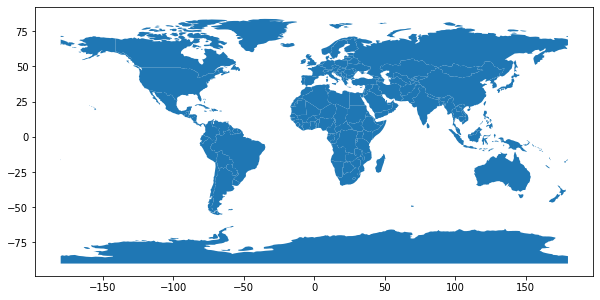

In [52]:
# !pip install matplotlib
all_countries_geoseries = geo_series_from_countries(all_countries)
all_countries_geoseries.plot(figsize=(10, 10))

In [36]:
filtered_countries = client_stub.SearchCountries(
    SearchCountriesRequest(
        keyword="A",
    )
)
print(len(filtered_countries.countries))

16


<AxesSubplot:>

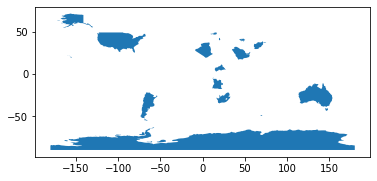

In [37]:
k_countries = geo_series_from_countries(filtered_countries)
k_countries.plot()

In [41]:
names = [c.name for c in filtered_countries.countries]
','.join(names)


'United States of America,Argentina,French Southern and Antarctic Lands,South Africa,Central African Republic,Angola,Algeria,United Arab Emirates,Afghanistan,Armenia,Austria,Albania,Australia,Azerbaijan,Saudi Arabia,Antarctica'

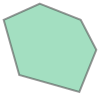

In [46]:
from shapely.geometry import Polygon

pts = [
    [22.67578125, 33.7243396617476],
    [30.41015625, 6.315298538330033],
    [60.29296874999999, -2.108898659243126],
    [68.73046875, 18.812717856407776],
    [60.99609375, 33.7243396617476],
    [40.60546875, 41.77131167976407],
    [22.67578125, 33.7243396617476],
]
polygon = Polygon(pts)
polygon

# serialize polygon to geometry compatible format
bounds = serializer.serialize(polygon)



<AxesSubplot:>

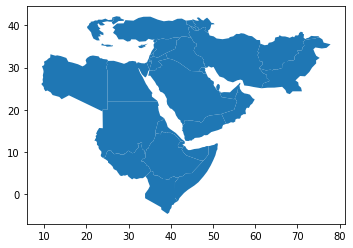

In [49]:
within = client_stub.GetCountriesInBoundary(GetCountriesInBoundaryRequest(boundary=bounds))

geoserie_within_boundary = geo_series_from_countries(within)
geoserie_within_boundary.plot()